In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import time
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default')
sns.set_palette("husl")

In [2]:

digits = datasets.load_digits()

X = digits.data  
y = digits.target  

print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")
print(f"Feature range: {X.min()} to {X.max()}")


print(f"\nClass distribution:")
unique, counts = np.unique(y, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")
    
print(f"Dataset shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")
print(f"Images shape: {digits.images.shape}")

Dataset Information:
Number of samples: 1797
Number of features: 64
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]
Feature range: 0.0 to 16.0

Class distribution:
Digit 0: 178 samples
Digit 1: 182 samples
Digit 2: 177 samples
Digit 3: 183 samples
Digit 4: 181 samples
Digit 5: 182 samples
Digit 6: 181 samples
Digit 7: 179 samples
Digit 8: 174 samples
Digit 9: 180 samples
Dataset shape: (1797, 64)
Target shape: (1797,)
Images shape: (1797, 8, 8)


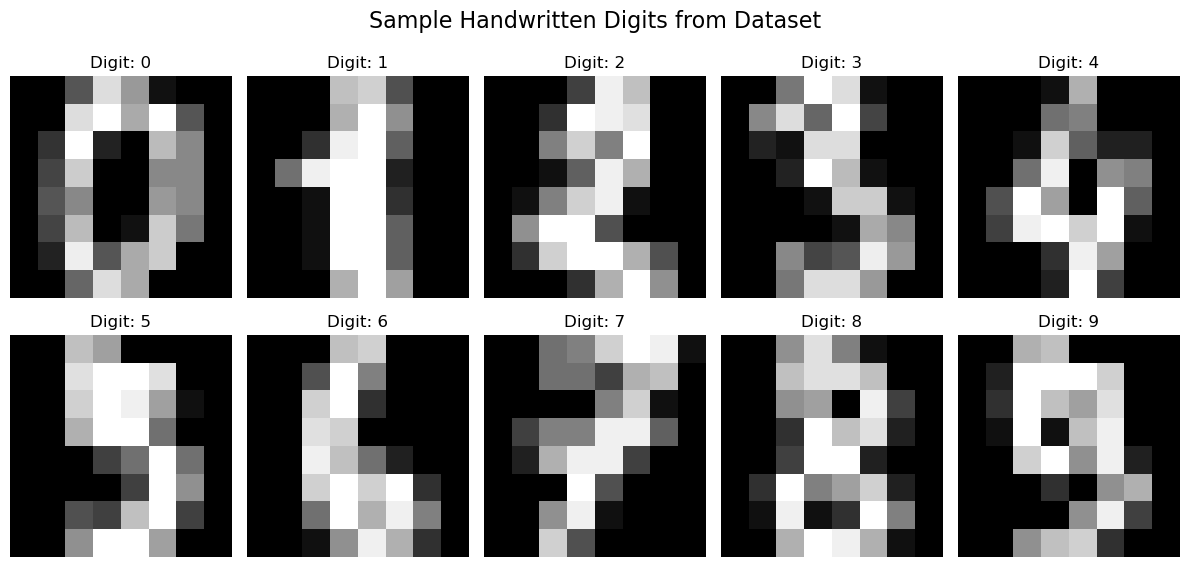

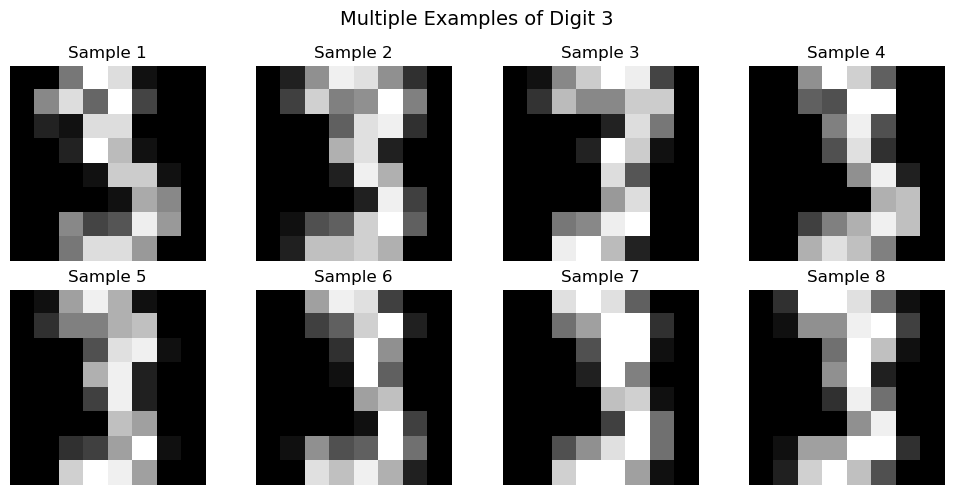

In [3]:

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample Handwritten Digits from Dataset', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5
    
    
    idx = np.where(y == i)[0][0]
    
    axes[row, col].imshow(digits.images[idx], cmap='gray')
    axes[row, col].set_title(f'Digit: {i}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


digit_to_show = 3
indices = np.where(y == digit_to_show)[0][:8]

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.suptitle(f'Multiple Examples of Digit {digit_to_show}', fontsize=14)

for i, idx in enumerate(indices):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(digits.images[idx], cmap='gray')
    axes[row, col].set_title(f'Sample {i+1}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [4]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split Information:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling applied:")
print(f"Original feature range: [{X_train.min():.2f}, {X_train.max():.2f}]")
print(f"Scaled feature range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")


print(f"\nTraining set class distribution:")
train_unique, train_counts = np.unique(y_train, return_counts=True)
for digit, count in zip(train_unique, train_counts):
    print(f"Digit {digit}: {count} samples")
    
print(f"\nTest set class distribution:")
test_unique, test_counts = np.unique(y_test, return_counts=True)
for digit, count in zip(test_unique, test_counts):
    print(f"Digit {digit}: {count} samples")

Data Split Information:
Training set: 1437 samples
Test set: 360 samples

Feature scaling applied:
Original feature range: [0.00, 16.00]
Scaled feature range: [-3.01, 37.89]

Training set class distribution:
Digit 0: 142 samples
Digit 1: 146 samples
Digit 2: 142 samples
Digit 3: 146 samples
Digit 4: 145 samples
Digit 5: 145 samples
Digit 6: 145 samples
Digit 7: 143 samples
Digit 8: 139 samples
Digit 9: 144 samples

Test set class distribution:
Digit 0: 36 samples
Digit 1: 36 samples
Digit 2: 35 samples
Digit 3: 37 samples
Digit 4: 36 samples
Digit 5: 37 samples
Digit 6: 36 samples
Digit 7: 36 samples
Digit 8: 35 samples
Digit 9: 36 samples


In [5]:

print("Training SVM with hyperparameter tuning...")
print("This may take a few minutes...")


param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}


svm_classifier = SVC(random_state=42)


start_time = time.time()
svm_grid_search = GridSearchCV(svm_classifier, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)
svm_training_time = time.time() - start_time

print(f"SVM training completed in {svm_training_time:.2f} seconds")
print(f"Best SVM parameters: {svm_grid_search.best_params_}")
print(f"Best cross-validation score: {svm_grid_search.best_score_:.4f}")


best_svm = svm_grid_search.best_estimator_

start_time = time.time()
svm_predictions = best_svm.predict(X_test_scaled)
svm_prediction_time = time.time() - start_time


svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"\nSVM Results:")
print(f"Test Accuracy: {svm_accuracy:.4f}")
print(f"Prediction time: {svm_prediction_time:.4f} seconds")
print(f"Number of support vectors: {best_svm.n_support_}")
print(f"Total support vectors: {sum(best_svm.n_support_)}")

Training SVM with hyperparameter tuning...
This may take a few minutes...
SVM training completed in 9.12 seconds
Best SVM parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.9819

SVM Results:
Test Accuracy: 0.9833
Prediction time: 0.0275 seconds
Number of support vectors: [32 79 62 64 68 65 49 71 81 77]
Total support vectors: 648
SVM training completed in 9.12 seconds
Best SVM parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.9819

SVM Results:
Test Accuracy: 0.9833
Prediction time: 0.0275 seconds
Number of support vectors: [32 79 62 64 68 65 49 71 81 77]
Total support vectors: 648


In [8]:
# k-NN with hyperparameter tuning
print("Training k-NN with hyperparameter tuning...")

# Define parameter grid for k-NN
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create k-NN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
start_time = time.time()
knn_grid_search = GridSearchCV(knn_classifier, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)
knn_training_time = time.time() - start_time

print(f"k-NN training completed in {knn_training_time:.2f} seconds")
print(f"Best k-NN parameters: {knn_grid_search.best_params_}")
print(f"Best cross-validation score: {knn_grid_search.best_score_:.4f}")

# Get the best k-NN model
best_knn = knn_grid_search.best_estimator_

# Make predictions
start_time = time.time()
knn_predictions = best_knn.predict(X_test_scaled)
knn_prediction_time = time.time() - start_time

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"\nk-NN Results:")
print(f"Test Accuracy: {knn_accuracy:.4f}")
print(f"Prediction time: {knn_prediction_time:.4f} seconds")
print(f"Best k value: {best_knn.n_neighbors}")
print(f"Best weights: {best_knn.weights}")
print(f"Best metric: {best_knn.metric}")

Training k-NN with hyperparameter tuning...
k-NN training completed in 4.58 seconds
Best k-NN parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.9763
k-NN training completed in 4.58 seconds
Best k-NN parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.9763

k-NN Results:
Test Accuracy: 0.9778
Prediction time: 4.5448 seconds
Best k value: 1
Best weights: uniform
Best metric: manhattan

k-NN Results:
Test Accuracy: 0.9778
Prediction time: 4.5448 seconds
Best k value: 1
Best weights: uniform
Best metric: manhattan


In [10]:

results_df = pd.DataFrame({
    'Model': ['SVM', 'k-NN'],
    'Accuracy': [svm_accuracy, knn_accuracy],
    'Training Time (s)': [svm_training_time, knn_training_time],
    'Prediction Time (s)': [svm_prediction_time, knn_prediction_time]
})

print("Model Comparison:")
print(results_df)


print("\n" + "="*50)
print("SVM Classification Report:")
print("="*50)
print(classification_report(y_test, svm_predictions))

print("\n" + "="*50)
print("k-NN Classification Report:")
print("="*50)
print(classification_report(y_test, knn_predictions))


svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_test, svm_predictions, average=None)
knn_precision, knn_recall, knn_f1, _ = precision_recall_fscore_support(y_test, knn_predictions, average=None)


detailed_results = pd.DataFrame({
    'Digit': range(10),
    'SVM_Precision': svm_precision,
    'SVM_Recall': svm_recall,
    'SVM_F1': svm_f1,
    'kNN_Precision': knn_precision,
    'kNN_Recall': knn_recall,
    'kNN_F1': knn_f1
})

print("\n" + "="*50)
print("Per-Class Performance Comparison:")
print("="*50)
print(detailed_results.round(4))

Model Comparison:
  Model  Accuracy  Training Time (s)  Prediction Time (s)
0   SVM  0.983333           9.124892             0.027450
1  k-NN  0.977778           4.580373             4.544785

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      1.00      0.97        36
           8       1.00      0.94      0.97        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360


k-NN Classification 

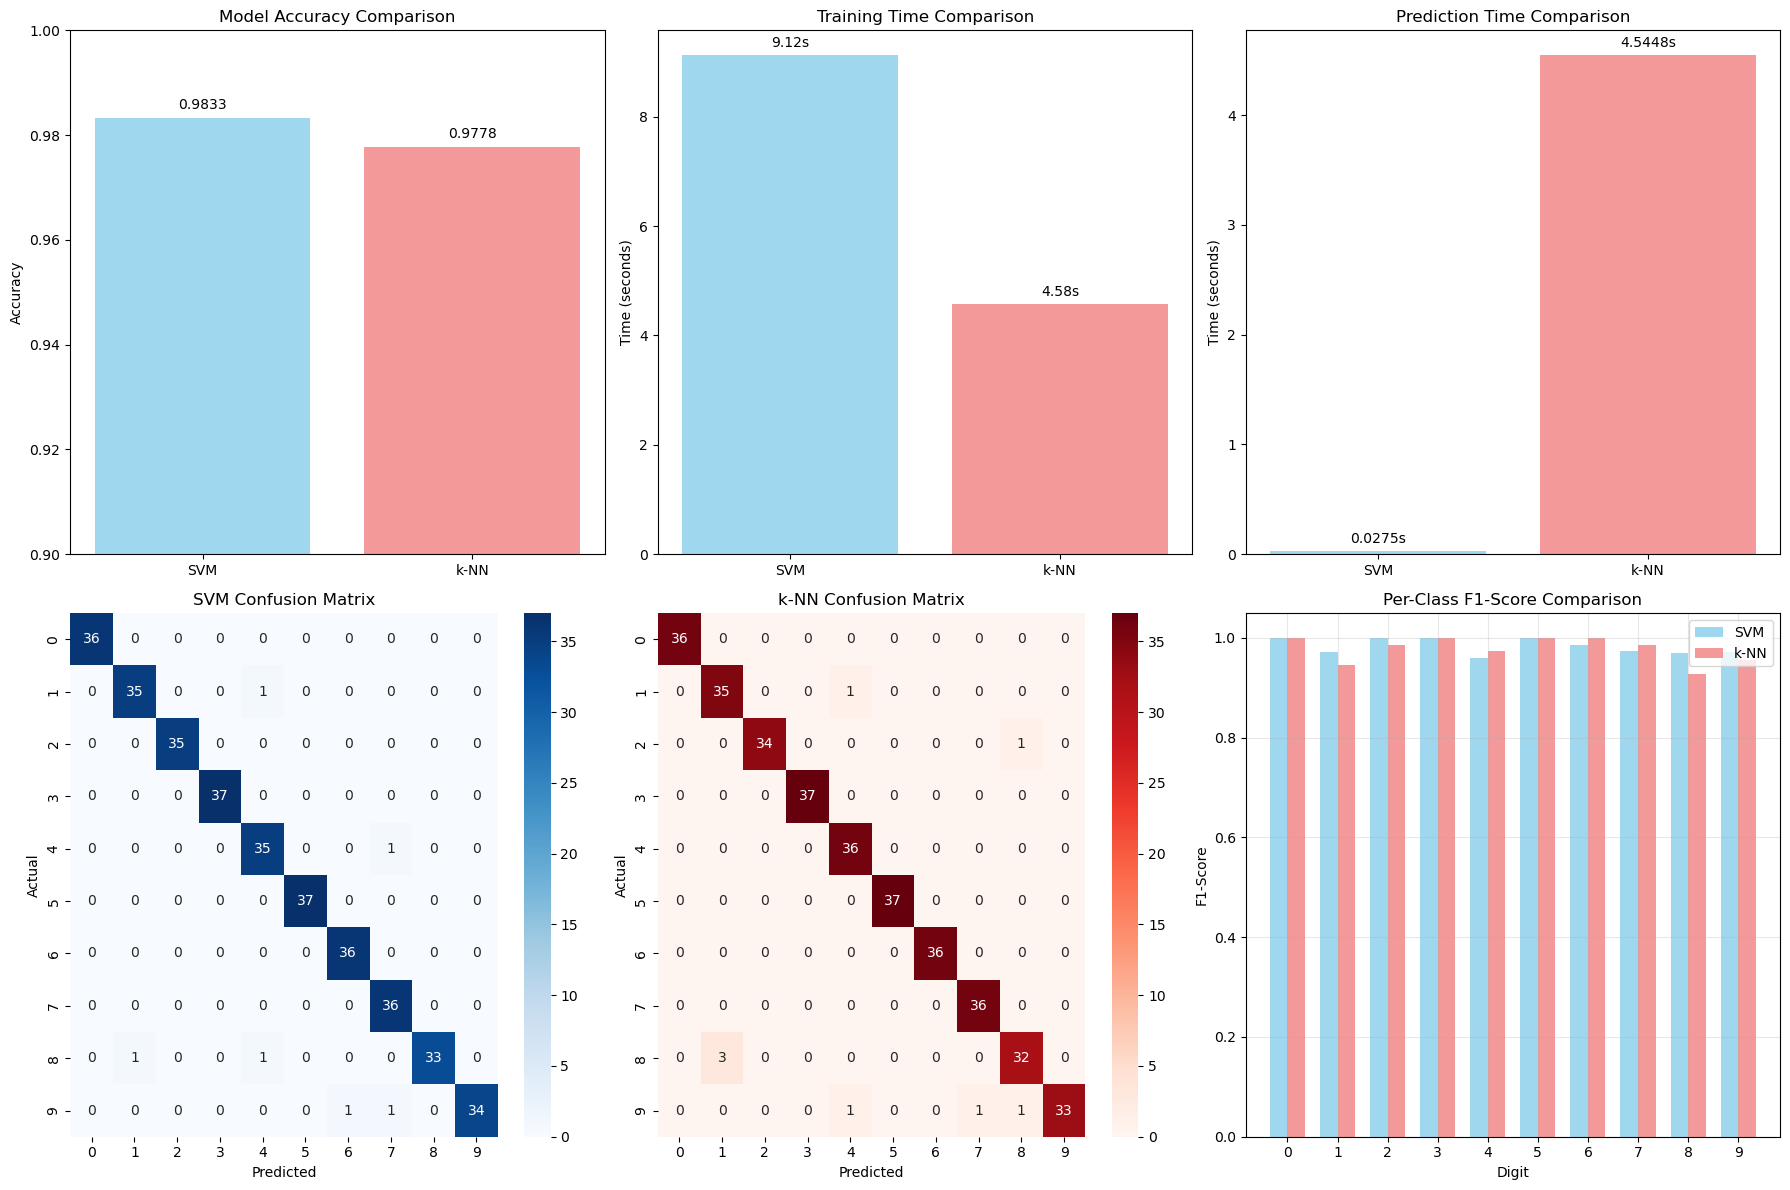

In [11]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].bar(['SVM', 'k-NN'], [svm_accuracy, knn_accuracy], 
               color=['skyblue', 'lightcoral'], alpha=0.8)
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0.9, 1.0)
for i, v in enumerate([svm_accuracy, knn_accuracy]):
    axes[0, 0].text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom')


axes[0, 1].bar(['SVM', 'k-NN'], [svm_training_time, knn_training_time], 
               color=['skyblue', 'lightcoral'], alpha=0.8)
axes[0, 1].set_title('Training Time Comparison')
axes[0, 1].set_ylabel('Time (seconds)')
for i, v in enumerate([svm_training_time, knn_training_time]):
    axes[0, 1].text(i, v + max(svm_training_time, knn_training_time)*0.01, 
                    f'{v:.2f}s', ha='center', va='bottom')

axes[0, 2].bar(['SVM', 'k-NN'], [svm_prediction_time, knn_prediction_time], 
               color=['skyblue', 'lightcoral'], alpha=0.8)
axes[0, 2].set_title('Prediction Time Comparison')
axes[0, 2].set_ylabel('Time (seconds)')
for i, v in enumerate([svm_prediction_time, knn_prediction_time]):
    axes[0, 2].text(i, v + max(svm_prediction_time, knn_prediction_time)*0.01, 
                    f'{v:.4f}s', ha='center', va='bottom')


svm_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('SVM Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')


knn_cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds', ax=axes[1, 1])
axes[1, 1].set_title('k-NN Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

x_pos = np.arange(10)
width = 0.35
axes[1, 2].bar(x_pos - width/2, svm_f1, width, label='SVM', color='skyblue', alpha=0.8)
axes[1, 2].bar(x_pos + width/2, knn_f1, width, label='k-NN', color='lightcoral', alpha=0.8)
axes[1, 2].set_title('Per-Class F1-Score Comparison')
axes[1, 2].set_xlabel('Digit')
axes[1, 2].set_ylabel('F1-Score')
axes[1, 2].set_xticks(x_pos)
axes[1, 2].set_xticklabels(range(10))
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Misclassified Samples Analysis:
SVM Misclassifications: 6 out of 360


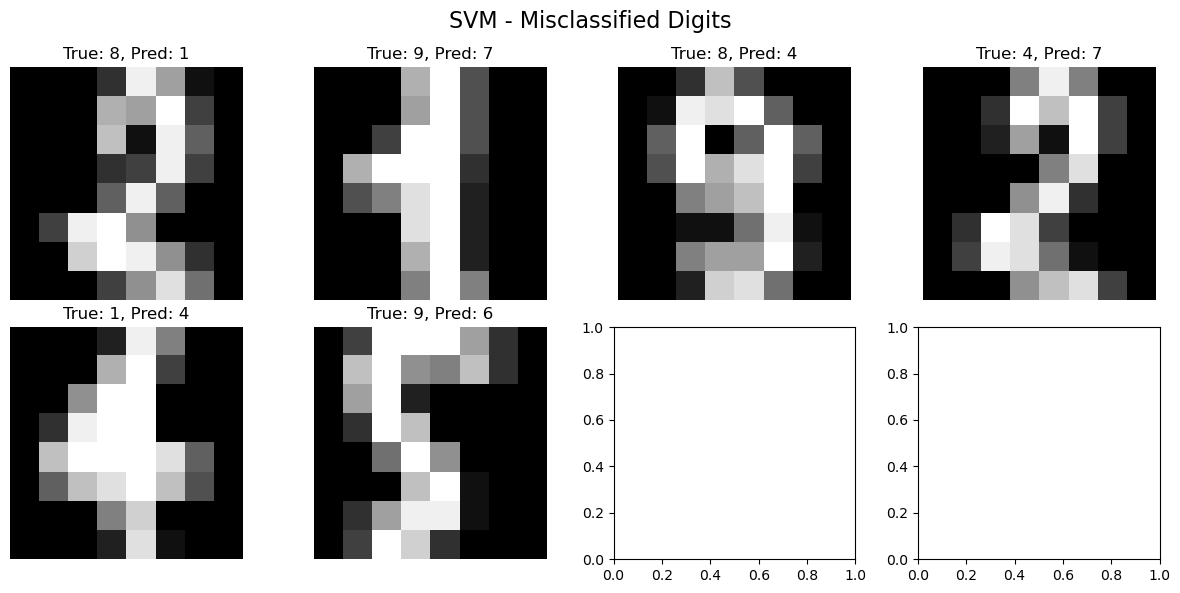

k-NN Misclassifications: 8 out of 360


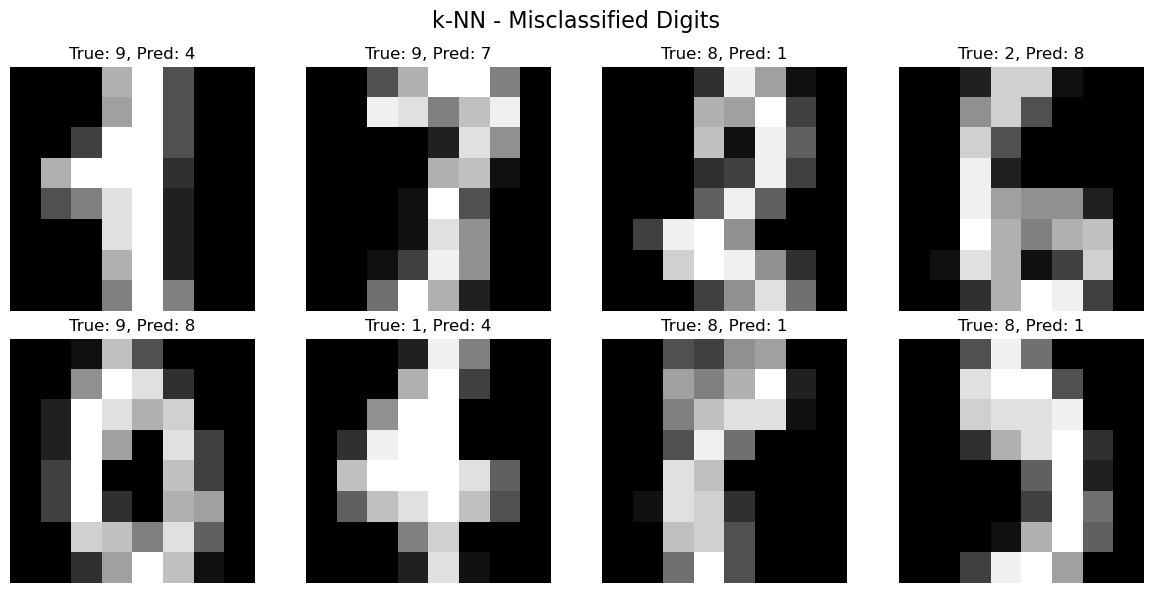

In [12]:

def show_misclassified_samples(y_true, y_pred, images, model_name, n_samples=8):
    """Show examples of misclassified digits"""
    misclassified_indices = np.where(y_true != y_pred)[0]
    
    if len(misclassified_indices) == 0:
        print(f"No misclassifications found for {model_name}!")
        return
    
    
    np.random.seed(42)
    selected_indices = np.random.choice(misclassified_indices, 
                                      min(n_samples, len(misclassified_indices)), 
                                      replace=False)
    
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle(f'{model_name} - Misclassified Digits', fontsize=16)
    
    for i, idx in enumerate(selected_indices):
        row = i // 4
        col = i % 4
        
        axes[row, col].imshow(images[idx], cmap='gray')
        axes[row, col].set_title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()


print("Misclassified Samples Analysis:")
print("="*50)


print(f"SVM Misclassifications: {sum(y_test != svm_predictions)} out of {len(y_test)}")
show_misclassified_samples(y_test, svm_predictions, 
                          digits.images[X_test.index if hasattr(X_test, 'index') else range(len(X_test))], 
                          'SVM')


print(f"k-NN Misclassifications: {sum(y_test != knn_predictions)} out of {len(y_test)}")
show_misclassified_samples(y_test, knn_predictions, 
                          digits.images[X_test.index if hasattr(X_test, 'index') else range(len(X_test))], 
                          'k-NN')

Sample Predictions:
Image Index: 0
True Label: 0
SVM Prediction: 0
k-NN Prediction: 0
------------------------------
Image Index: 100
True Label: 4
SVM Prediction: 4
k-NN Prediction: 4
------------------------------
Image Index: 200
True Label: 1
SVM Prediction: 1
k-NN Prediction: 1
------------------------------
Image Index: 300
True Label: 7
SVM Prediction: 7
k-NN Prediction: 7
------------------------------
Image Index: 400
True Label: 4
SVM Prediction: 4
k-NN Prediction: 4
------------------------------

Detailed Prediction Analysis for Sample 100:


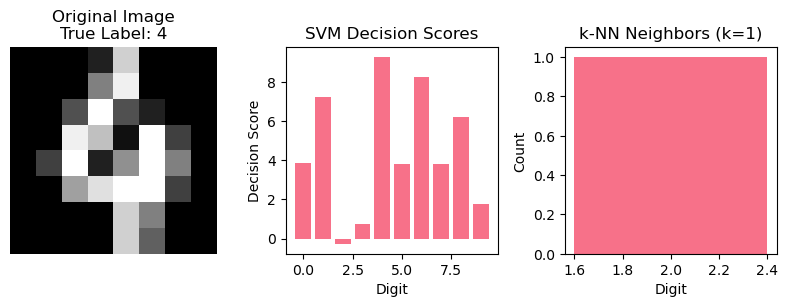

Image Index: 100
True Label: 4
SVM Prediction: 4
k-NN Prediction: 4
------------------------------


(np.int64(4), np.int64(4))

In [15]:

def predict_digit(image_index, show_image=True):
    """Predict digit for a given image index and compare models"""
    
    if show_image:
        plt.figure(figsize=(8, 3))
        
        
        plt.subplot(1, 3, 1)
        plt.imshow(digits.images[image_index], cmap='gray')
        plt.title(f'Original Image\nTrue Label: {digits.target[image_index]}')
        plt.axis('off')
        
        
        plt.subplot(1, 3, 2)
        if hasattr(best_svm, 'decision_function'):
            sample_scaled = scaler.transform([digits.data[image_index]])
            decision_scores = best_svm.decision_function(sample_scaled)
            plt.bar(range(10), decision_scores[0])
            plt.title('SVM Decision Scores')
            plt.xlabel('Digit')
            plt.ylabel('Decision Score')
        
        
        plt.subplot(1, 3, 3)
        sample_scaled = scaler.transform([digits.data[image_index]])
        distances, indices = best_knn.kneighbors(sample_scaled)
        neighbor_labels = [digits.target[i] for i in indices[0]]
        unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
        plt.bar(unique_labels, counts)
        plt.title(f'k-NN Neighbors (k={best_knn.n_neighbors})')
        plt.xlabel('Digit')
        plt.ylabel('Count')
        
        plt.tight_layout()
        plt.show()
    
    
    sample_scaled = scaler.transform([digits.data[image_index]])
    svm_pred = best_svm.predict(sample_scaled)[0]
    knn_pred = best_knn.predict(sample_scaled)[0]
    
    print(f"Image Index: {image_index}")
    print(f"True Label: {digits.target[image_index]}")
    print(f"SVM Prediction: {svm_pred}")
    print(f"k-NN Prediction: {knn_pred}")
    print("-" * 30)
    
    return svm_pred, knn_pred


print("Sample Predictions:")
print("="*50)


test_indices = [0, 100, 200, 300, 400]
for idx in test_indices:
    predict_digit(idx, show_image=False)


print("\nDetailed Prediction Analysis for Sample 100:")
predict_digit(100, show_image=True)